https://www.kaggle.com/code/shriharijhawar13/cnn-model-for-sign-language-mnist-dataset#CNN-Model-creation

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

In [23]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [24]:
X_train = training_data.drop(labels = ["label"],axis = 1) 
Y_train = training_data["label"]

In [25]:
X_test = test_data.drop(labels = ["label"],axis = 1)
Y_test = test_data["label"]

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(27455, 784)

(7172, 784)

(27455,)

(7172,)

<AxesSubplot:xlabel='label', ylabel='Count'>

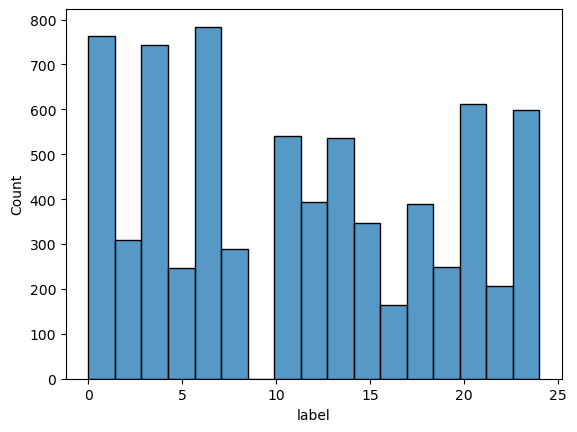

In [28]:
sns.histplot(x=Y_test, data = Y_test)

<AxesSubplot:xlabel='label', ylabel='Count'>

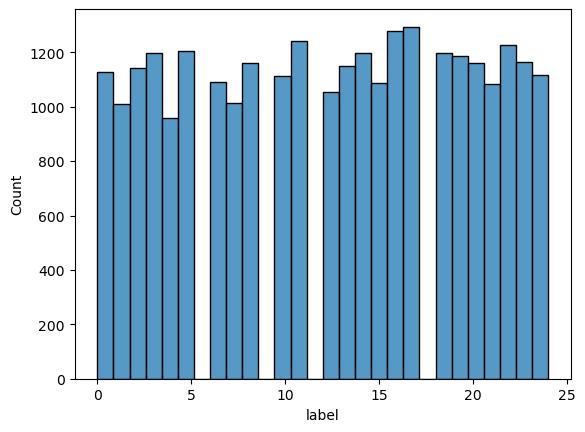

In [29]:
sns.histplot(x=Y_train, data = Y_train)

In [32]:
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()

apprentissage_LR = round(stop1-start,3)
prediction_LR = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_LR} s")
print(f"Temps d'apprentissage+prediction : {prediction_LR} s")

Temps d'apprentissage : 99.819 s
Temps d'apprentissage+prediction : 99.835 s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


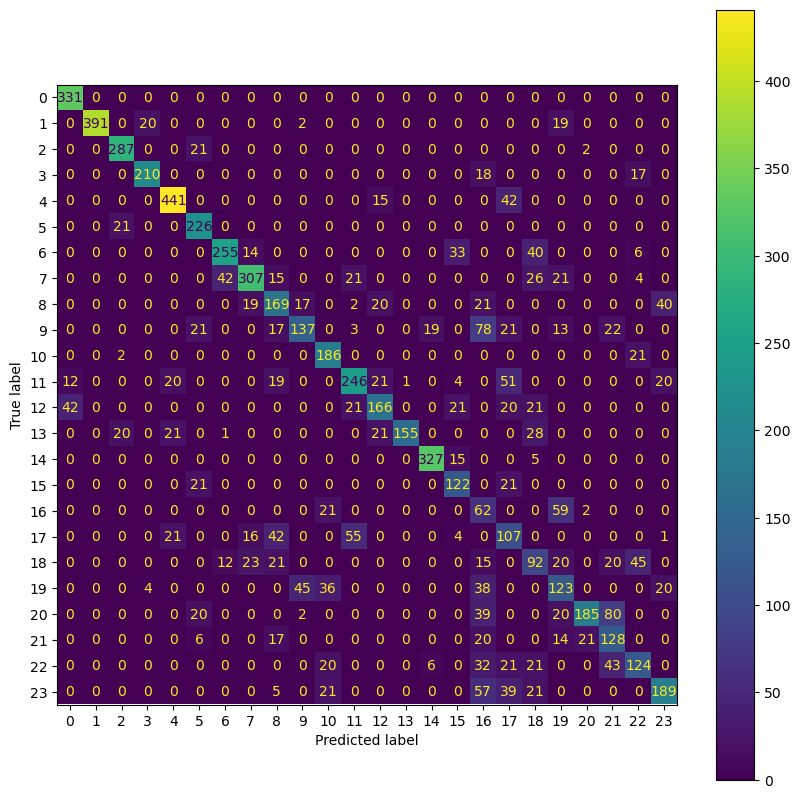

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [14]:
# from sklearn.metrics import precision_score,f1_score

# precision = precision_score(Y_test,Y_pred)
# f1_score = f1_score(Y_test,Y_pred)
# tp,fp,fn,tn=cm.ravel()
# sensibilite = tp/(tp+fn)
# specificite = tn/(tn+fp)

In [34]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_raw_LR = pd.DataFrame.from_dict(report)
score_classification_report_raw_LR=classification_report_raw_LR['macro avg']

In [35]:
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
start = time.time()

model = LogisticRegression(max_iter=1000)

reg = model.fit(X_train,Y_train)
stop1 = time.time()


Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_LR_normalize = round(stop1-start,3)
prediction_LR_normalize = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_LR_normalize} s")
print(f"Temps d'apprentissage+prediction : {prediction_LR_normalize} s")

Temps d'apprentissage : 67.424 s
Temps d'apprentissage+prediction : 67.447 s


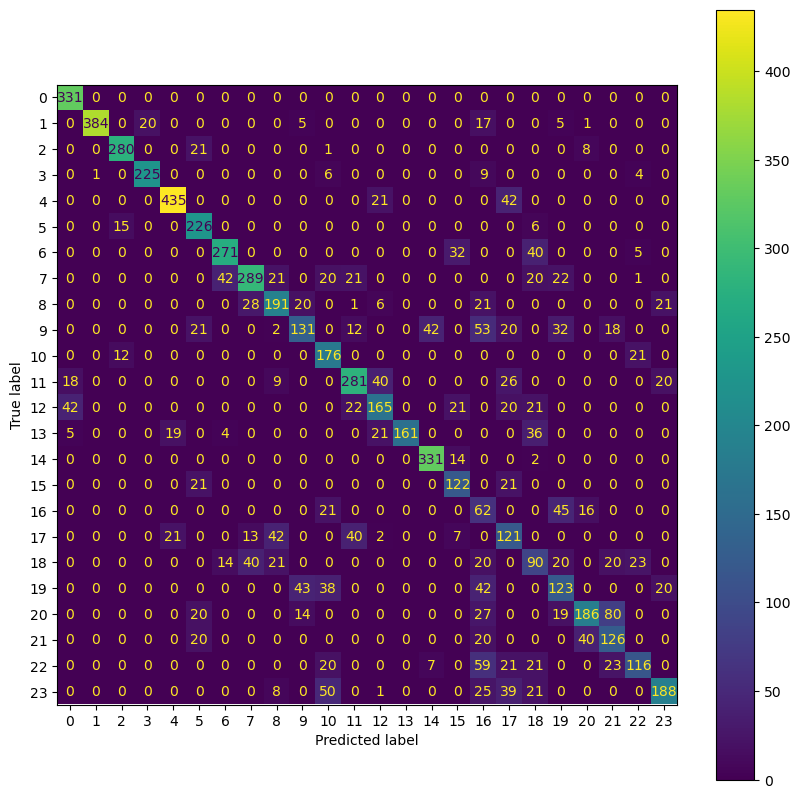

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [47]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_normalize_LR = pd.DataFrame.from_dict(report)
score_classification_report_normalize_LR=classification_report_normalize_LR['macro avg']

**Normaliser permet d'avoir de meilleurs scores et de converger**

**Utiliser Gaussian NB**

In [51]:
from sklearn.naive_bayes import GaussianNB
start = time.time()

model = GaussianNB()

reg = model.fit(X_train,Y_train)
stop1 = time.time()


Y_pred = model.predict(X_test)

stop2 = time.time()
apprentissage_NB = round(stop1-start,3)
prediction_NB = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_NB} s")
print(f"Temps d'apprentissage+prediction : {prediction_NB} s")

Temps d'apprentissage : 0.883 s
Temps d'apprentissage+prediction : 2.586 s


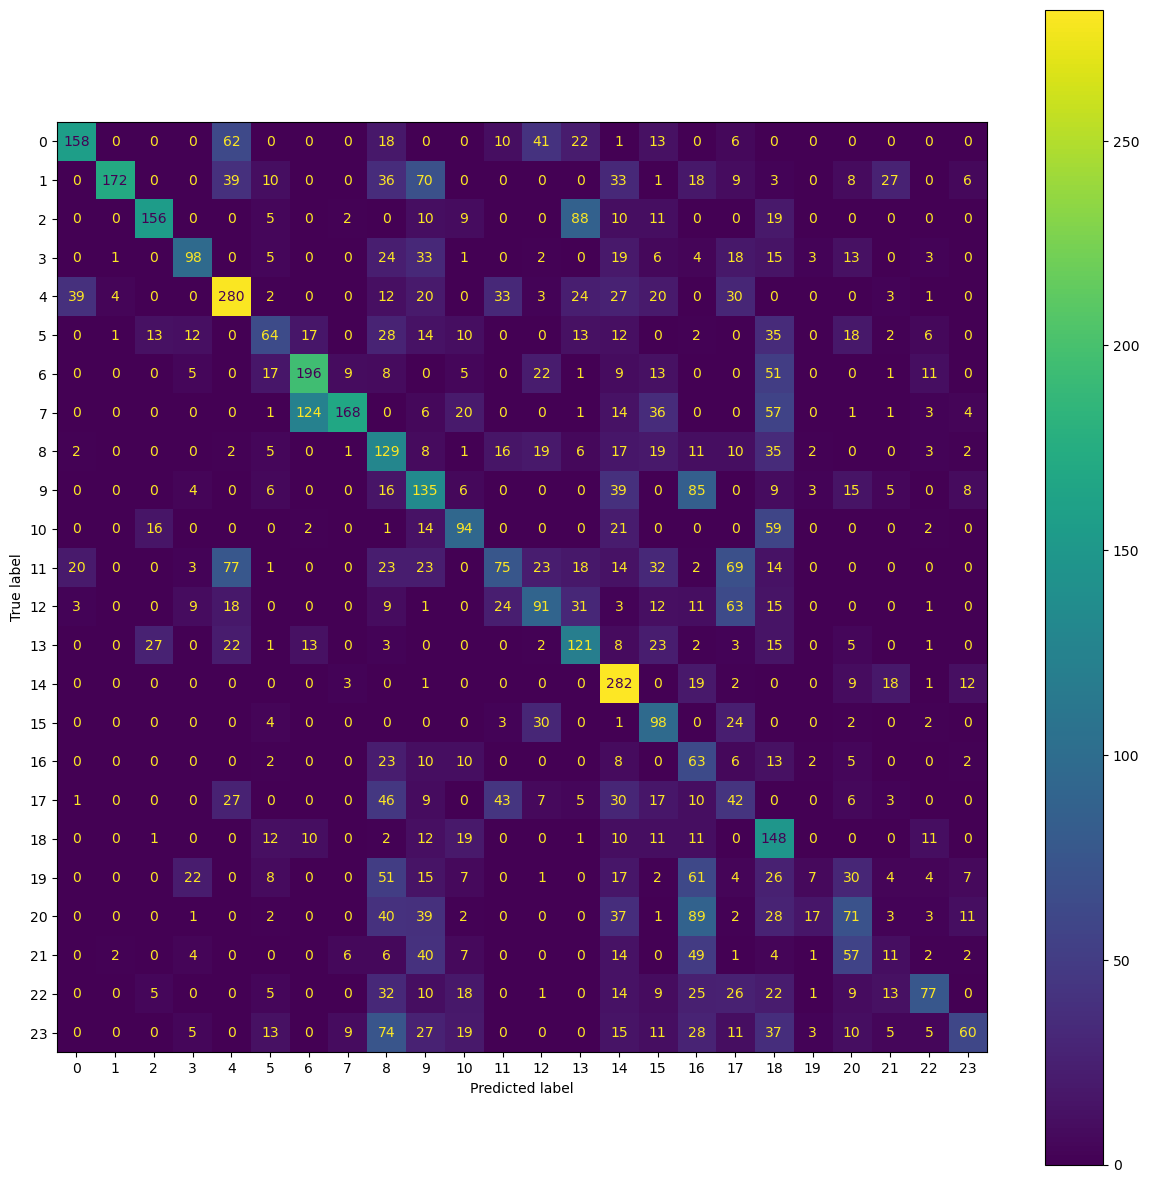

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

# changer la taille de la figure en utilisant la méthode set_size_inches
fig.set_size_inches(15, 15)

In [50]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_NB = pd.DataFrame.from_dict(report)
score_classification_report_NB=classification_report_NB['macro avg']

**Utiliser le decision tree**

In [53]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()

# créer un modèle d'arbres de décision
model = DecisionTreeClassifier()

# entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, Y_train)
stop1 = time.time()

# prédire des labels pour les données de test
Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_DTC = round(stop1-start,3)
prediction_DTC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_DTC} s")
print(f"Temps d'apprentissage+prediction : {prediction_DTC} s")

Temps d'apprentissage : 21.64 s
Temps d'apprentissage+prediction : 21.656 s


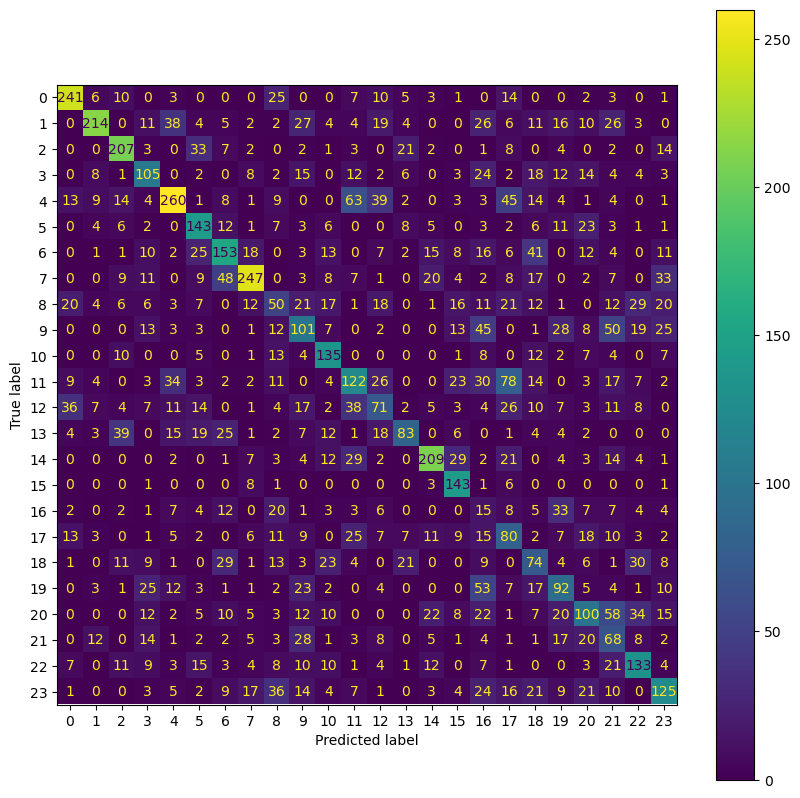

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [55]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_DTC = pd.DataFrame.from_dict(report)
score_classification_report_DTC=classification_report_DTC['macro avg']

**Random Forrest Classfiier**

In [58]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()

reg = model.fit(X_train,Y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Temps d'apprentissage : 53.153 s
Temps d'apprentissage+prediction : 53.685 s


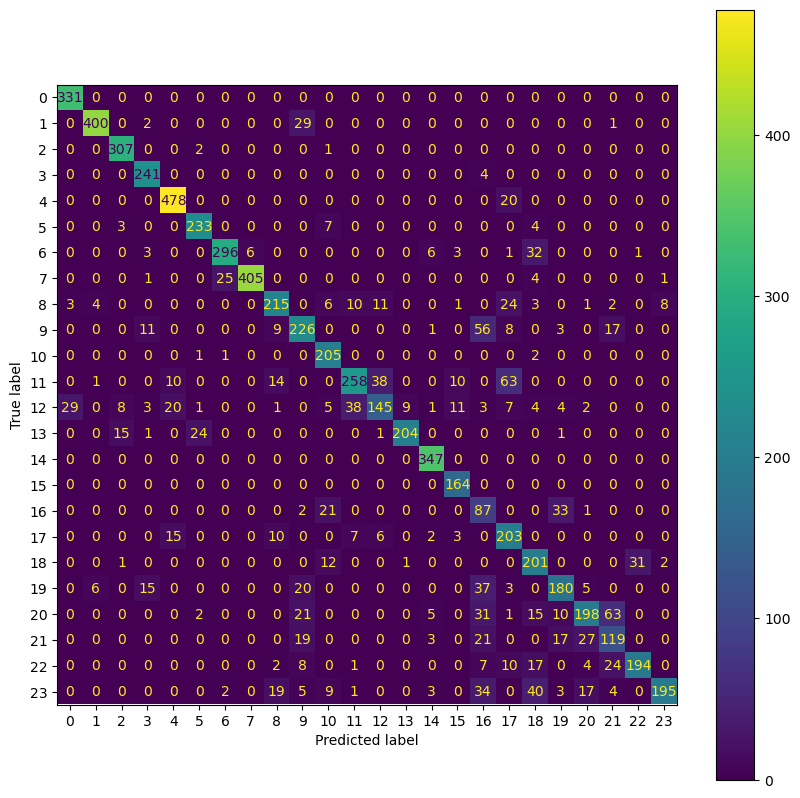

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [59]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_RFC = pd.DataFrame.from_dict(report)
classification_report_RFC
score_classification_report_RFC=classification_report_RFC['macro avg']

In [64]:
from sklearn.neural_network import MLPClassifier
start=time.time()
model = MLPClassifier()

reg = model.fit(X_train,Y_train)
stop1=time.time()
Y_pred = model.predict(X_test)
stop2=time.time()
apprentissage_MLPC = round(stop1-start,3)
prediction_MLPC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_MLPC} s")
print(f"Temps d'apprentissage+prediction : {prediction_MLPC} s")

Temps d'apprentissage : 37.477 s
Temps d'apprentissage+prediction : 37.514 s


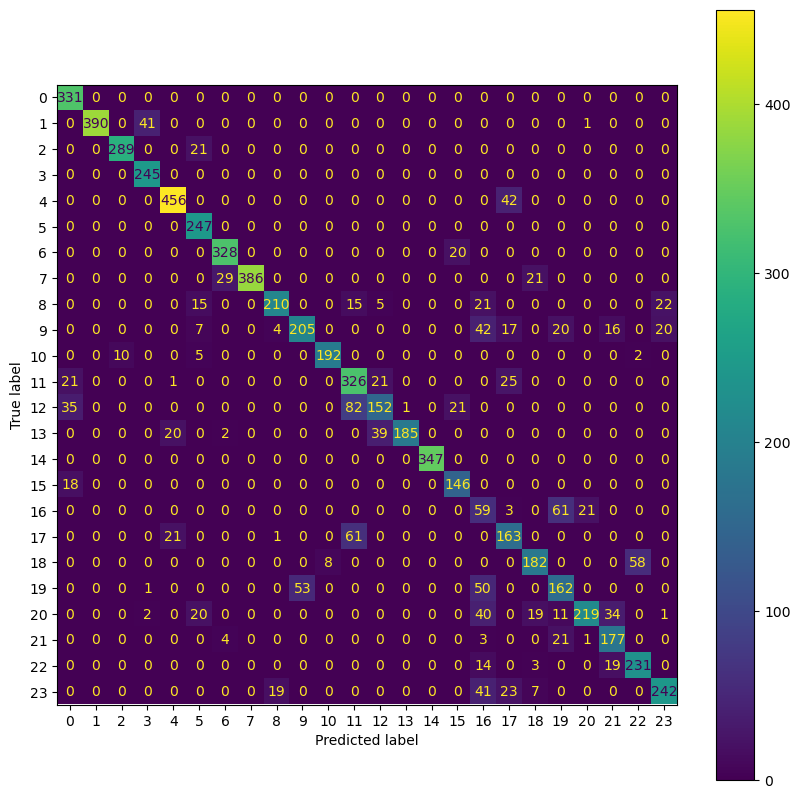

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [66]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_MLPC = pd.DataFrame.from_dict(report)
classification_report_MLPC
score_classification_report_MLPC=classification_report_MLPC['macro avg']

In [170]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
start=time.time()
# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu')

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)
stop1=time.time()

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)

# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)
stop2=time.time()

apprentissage_BMLPC = round(stop1-start,3)
prediction_BMLPC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_BMLPC} s")
print(f"Temps d'apprentissage+prediction : {prediction_BMLPC} s")

Temps d'apprentissage : 31.581 s
Temps d'apprentissage+prediction : 352.832 s


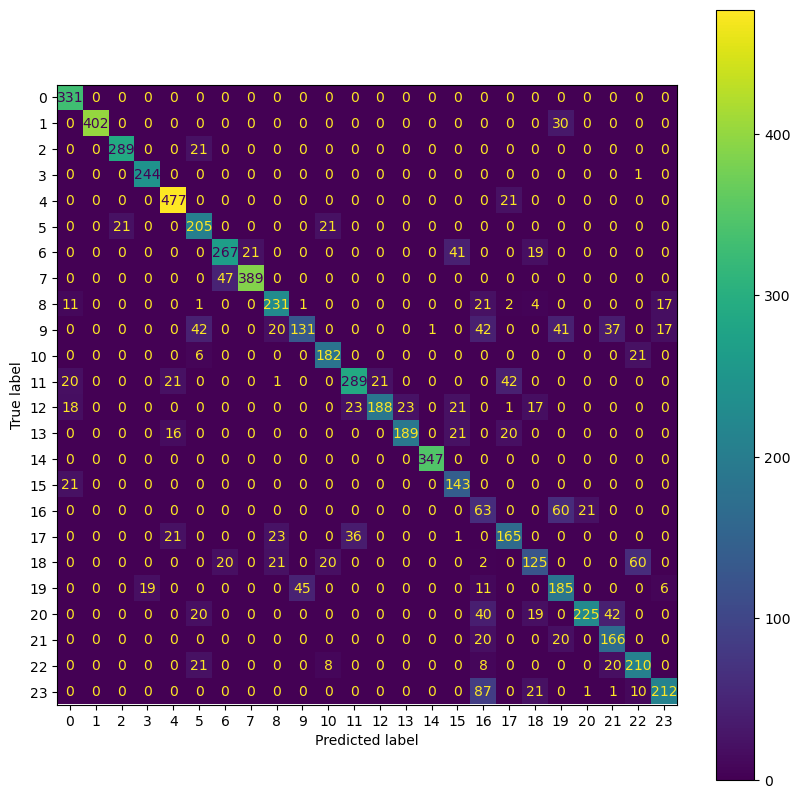

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [70]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC = pd.DataFrame.from_dict(report)
classification_report_BMLPC
score_classification_report_BMLPC=classification_report_BMLPC['macro avg']

**On cherche de meilleurs paramètres**

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir les hyperparamètres à tester
parameters = {'hidden_layer_sizes': [(100, 100), (200, 200)],
              'activation': ['relu', 'tanh'],
              'alpha': [0.0001, 0.001]}

# Utiliser la recherche en grille pour sélectionner les meilleurs hyperparamètres
clf = GridSearchCV(MLPClassifier(), parameters, cv=5)
clf.fit(X_train_scaled, Y_train)

# Imprimer les meilleurs hyperparamètres trouvés
print(clf.best_params_)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Normaliser les données d'entrée
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
start=time.time()
# Définir le classificateur de réseau de neurones avec plusieurs couches cachées et fonctions d'activation différentes
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',alpha=0.0001)

# Entraîner le modèle
reg = model.fit(X_train_scaled, Y_train)
stop1=time.time()

# Prédire les résultats sur les données de test
Y_pred = model.predict(X_test_scaled)
# Utiliser la méthode de bagging pour combiner plusieurs classificateurs de réseau de neurones
bagging = BaggingClassifier(base_estimator=model, n_estimators=10)
reg = bagging.fit(X_train_scaled, Y_train)

stop2=time.time()
apprentissage_BMLPC2 = round(stop1-start,3)
prediction_BMLPC2 = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_BMLPC2} s")
print(f"Temps d'apprentissage+prediction : {prediction_BMLPC2} s")

Temps d'apprentissage : 30.911 s
Temps d'apprentissage+prediction : 355.475 s


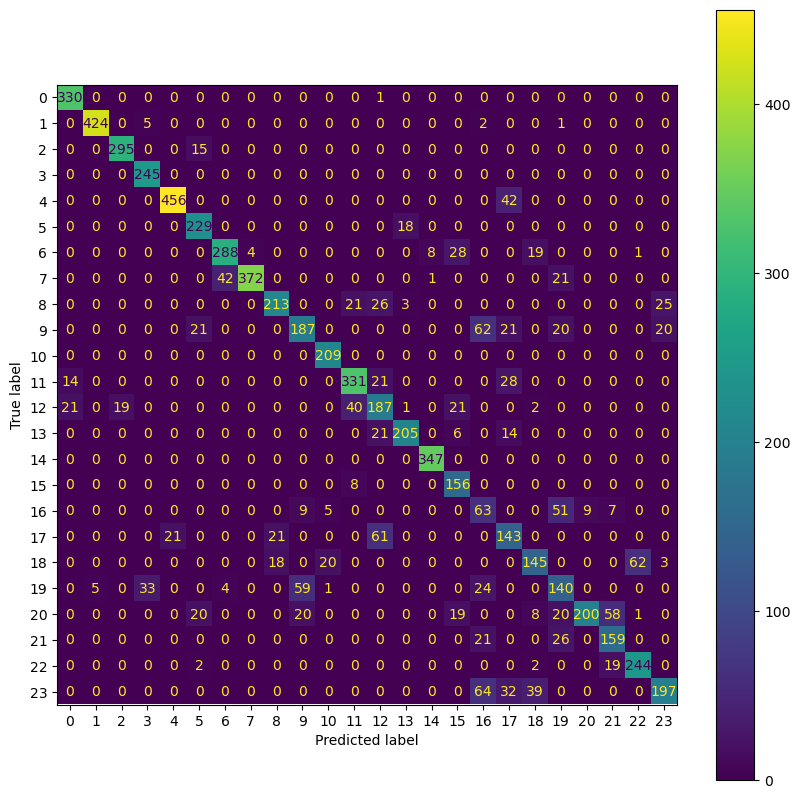

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [79]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred,output_dict=True)

classification_report_BMLPC2 = pd.DataFrame.from_dict(report)
classification_report_BMLPC2
score_classification_report_BMLPC2=classification_report_BMLPC2['macro avg']

**Pas vraiment de meilleurs résultats**

In [291]:
# In this step we are dividing the dataset in to X and Y training values
# X contains information about the images 
# Y contains the correspondind label of that image
# These two values will be used to train the model
#creating our X for the training data
x_train = training_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_train = training_data["label"]

# In this step we are dividing the dataset in to X and Y test values
# X contains information about the images
# Y contains the correspondind label of that image
# These two values will be used to test the model
#creating our X for the training data
x_test = test_data.drop(labels = ["label"],axis = 1) 
#creating our Y for the training data
y_test = test_data["label"]

In [292]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [293]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [294]:
model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [295]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [296]:

epochs = 13
batch_size = 128
model_history = model.fit(x = x_train, y = y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/13
215/215 [==============================] - 21s 91ms/step - loss: 3.1547 - accuracy: 0.0956
Epoch 2/13
215/215 [==============================] - 22s 103ms/step - loss: 2.0087 - accuracy: 0.3553
Epoch 3/13
215/215 [==============================] - 23s 105ms/step - loss: 1.0441 - accuracy: 0.6329
Epoch 4/13
215/215 [==============================] - 22s 103ms/step - loss: 0.6515 - accuracy: 0.7710
Epoch 5/13
215/215 [==============================] - 22s 103ms/step - loss: 0.4504 - accuracy: 0.8421
Epoch 6/13
215/215 [==============================] - 23s 106ms/step - loss: 0.3290 - accuracy: 0.8868
Epoch 7/13
215/215 [==============================] - 22s 103ms/step - loss: 0.2470 - accuracy: 0.9174
Epoch 8/13
215/215 [==============================] - 23s 105ms/step - loss: 0.1978 - accuracy: 0.9343
Epoch 9/13
215/215 [==============================] - 22s 104ms/step - loss: 0.1520 - accuracy: 0.9502
Epoch 10/13
215/215 [==============================] - 22s 104ms/step - lo

In [297]:
pred = model.predict(x_test)

225/225 [==============================] - 2s 6ms/step


In [305]:
start=time.time()

model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


epochs = 13
batch_size = 128
model_history = model.fit(x = x_train, y = y_train, epochs = epochs, batch_size = batch_size)
stop1=time.time()
pred = model.predict(x_test)
stop2=time.time()
apprentissage_CNN = round(stop1-start,3)
prediction_CNN = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_CNN} s")
print(f"Temps d'apprentissage+prediction : {prediction_CNN} s")

Epoch 1/13
215/215 [==============================] - 20s 90ms/step - loss: 3.1474 - accuracy: 0.0944
Epoch 2/13
215/215 [==============================] - 22s 103ms/step - loss: 1.9936 - accuracy: 0.3540
Epoch 3/13
215/215 [==============================] - 22s 104ms/step - loss: 1.0757 - accuracy: 0.6253
Epoch 4/13
215/215 [==============================] - 23s 105ms/step - loss: 0.6730 - accuracy: 0.7634
Epoch 5/13
215/215 [==============================] - 22s 104ms/step - loss: 0.4607 - accuracy: 0.8395
Epoch 6/13
215/215 [==============================] - 22s 104ms/step - loss: 0.3373 - accuracy: 0.8864
Epoch 7/13
215/215 [==============================] - 23s 107ms/step - loss: 0.2609 - accuracy: 0.9117
Epoch 8/13
215/215 [==============================] - 22s 104ms/step - loss: 0.2040 - accuracy: 0.9308
Epoch 9/13
215/215 [==============================] - 23s 105ms/step - loss: 0.1596 - accuracy: 0.9481
Epoch 10/13
215/215 [==============================] - 22s 104ms/step - lo

In [298]:
display(y_train.shape)
display(y_test.shape)
display(pred.shape)

(27455,)

(7172,)

(7172, 26)

In [299]:
# Convertir les probabilités de classe en prédictions de classe
y_pred = np.argmax(pred, axis=1)

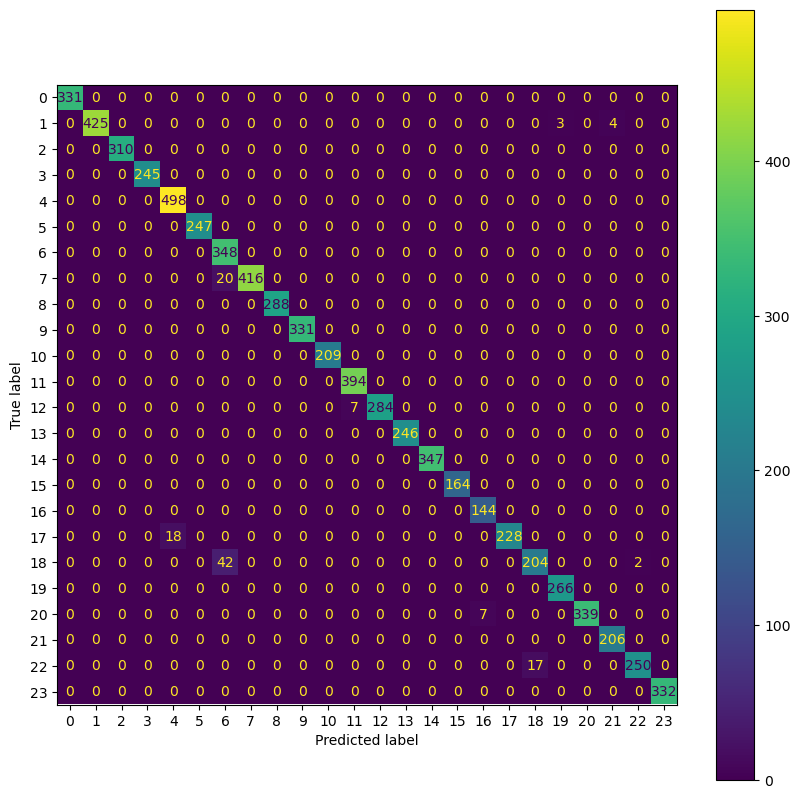

In [300]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [301]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred,output_dict=True)

classification_report_CNN = pd.DataFrame.from_dict(report)
classification_report_CNN
score_classification_report_CNN=classification_report_CNN['macro avg']

In [302]:
# Obtenir un dictionnaire contenant toutes les variables globales
global_vars = globals()

# Filtrer les variables ayant un nom commençant par classification_report_
classification_report_vars = [v for k, v in global_vars.items() if k.startswith('score_classification_')]

# Imprimer les variables
for var in classification_report_vars:
    print(var)

precision       0.688990
recall          0.675662
f1-score        0.671070
support      7172.000000
Name: macro avg, dtype: float64
precision       0.690512
recall          0.682157
f1-score        0.675321
support      7172.000000
Name: macro avg, dtype: float64
precision       0.424823
recall          0.384098
f1-score        0.369259
support      7172.000000
Name: macro avg, dtype: float64
precision       0.437684
recall          0.436847
f1-score        0.429908
support      7172.000000
Name: macro avg, dtype: float64
precision       0.798893
recall          0.798691
f1-score        0.792274
support      7172.000000
Name: macro avg, dtype: float64
precision       0.812205
recall          0.805800
f1-score        0.802141
support      7172.000000
Name: macro avg, dtype: float64
precision       0.776440
recall          0.774307
f1-score        0.765861
support      7172.000000
Name: macro avg, dtype: float64
precision       0.785528
recall          0.792182
f1-score        0.782450
s

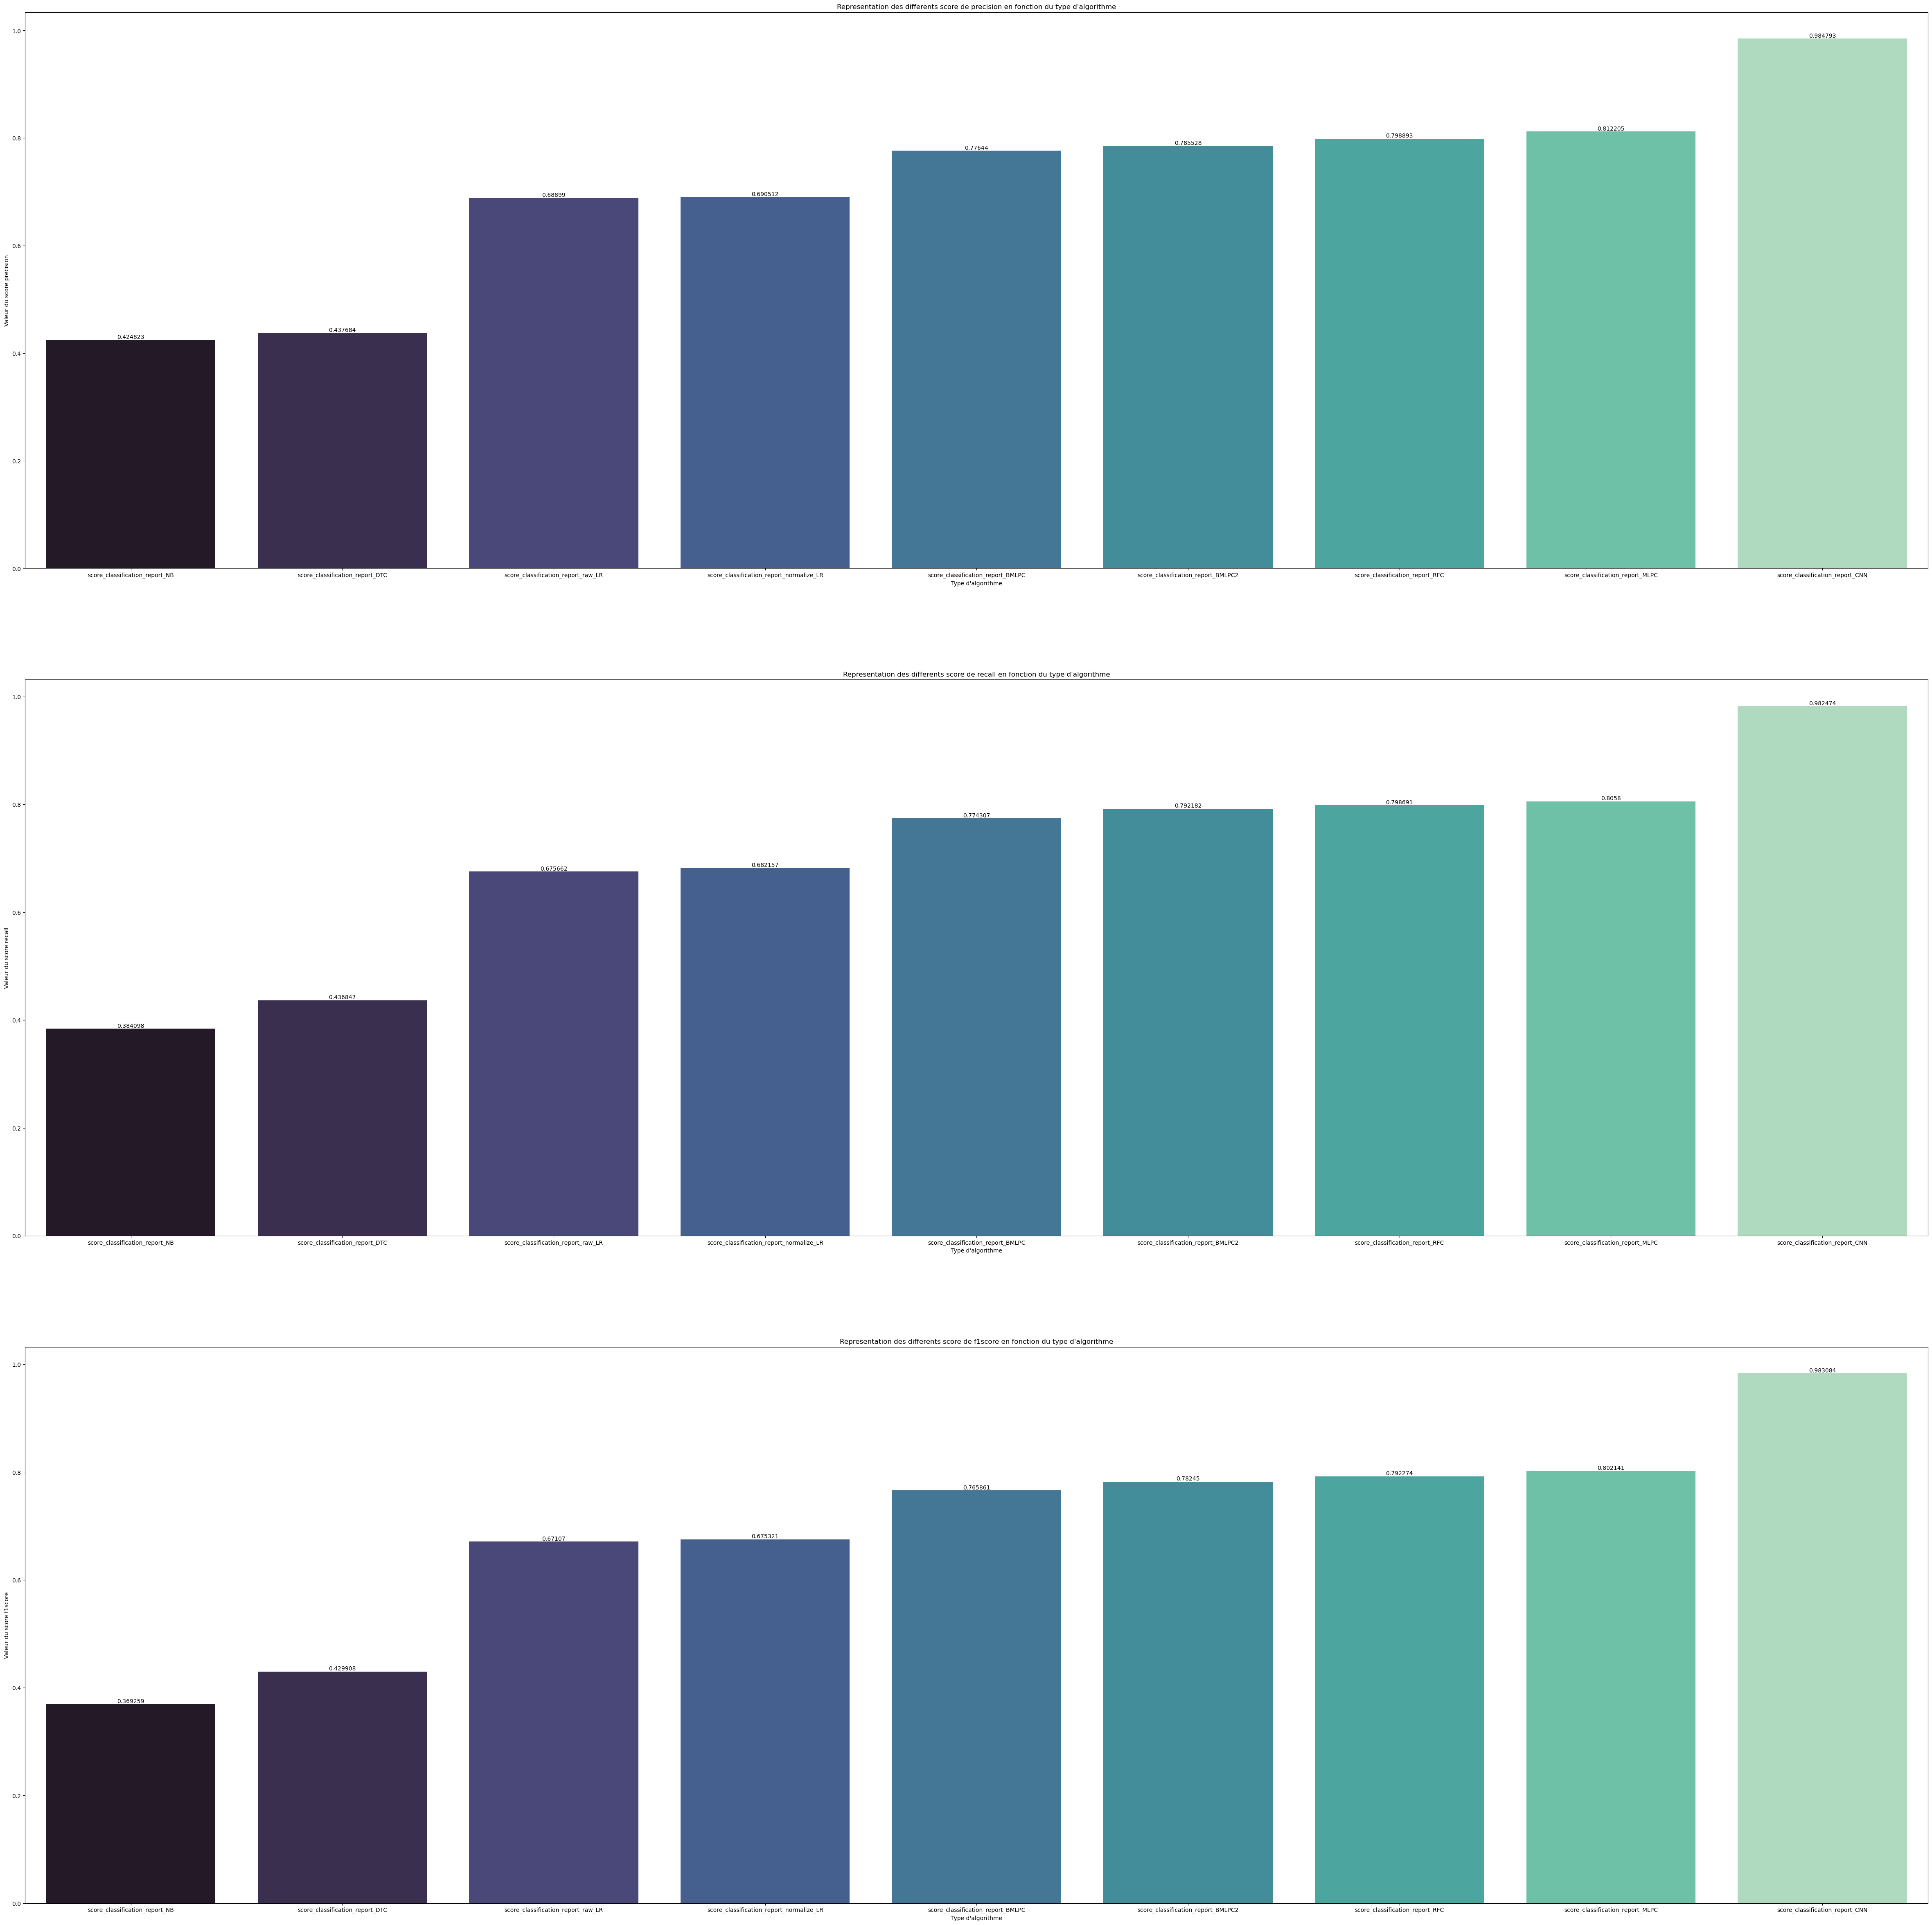

In [303]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('score_classification'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

# data

df_score = pd.DataFrame(data)

s=df_score.iloc[0,:]
df_score_precision=s.to_frame()
df_score_precision=df_score_precision.T

v=df_score.iloc[1,:]
df_score_recall=v.to_frame()
df_score_recall=df_score_recall.T

w=df_score.iloc[2,:]
df_score_f1score=w.to_frame()
df_score_f1score=df_score_f1score.T

j=df_score.iloc[3,:]
df_score_support=j.to_frame()
df_score_support=df_score_support.T

df_score_precision.sort_values(by=['precision'],axis=1,inplace=True)
df_score_recall.sort_values(by=['recall'],axis=1,inplace=True)
df_score_f1score.sort_values(by=['f1-score'],axis=1,inplace=True)

# figure, ax = plt.subplots(figsize=(30, 30))
# fig = sns.barplot(data = df_score_precision)
# fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score precision",title = "Representation des differents score de precision en fonction du type d'algorithme")
# fig.bar_label(ax.containers[0])
# fig2=sns.barplot(data = df_score_recall)
# fig2.set(xlabel="Type d'algorithme",ylabel="Valeur du score precision",title = "Representation des differents score de recall en fonction du type d'algorithme")
# fig2.bar_label(ax.containers[0])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(60,60))
# plot the first data frame
# df1.plot(ax=ax1)
fig = sns.barplot(data = df_score_precision,ax=ax1,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score precision",title = "Representation des differents score de precision en fonction du type d'algorithme")
fig.bar_label(ax1.containers[0])
# plot the second data frame
fig = sns.barplot(data = df_score_recall,ax=ax2,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score recall",title = "Representation des differents score de recall en fonction du type d'algorithme")
fig.bar_label(ax2.containers[0])
# plot the third data frame
fig = sns.barplot(data = df_score_f1score,ax=ax3,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Valeur du score f1score",title = "Representation des differents score de f1score en fonction du type d'algorithme")
fig.bar_label(ax3.containers[0])
# show the figure
plt.show()

[Text(0, 0, '0.883'),
 Text(0, 0, '21.64'),
 Text(0, 0, '30.911'),
 Text(0, 0, '31.581'),
 Text(0, 0, '37.23'),
 Text(0, 0, '37.477'),
 Text(0, 0, '67.424'),
 Text(0, 0, '67.768'),
 Text(0, 0, '290.32')]

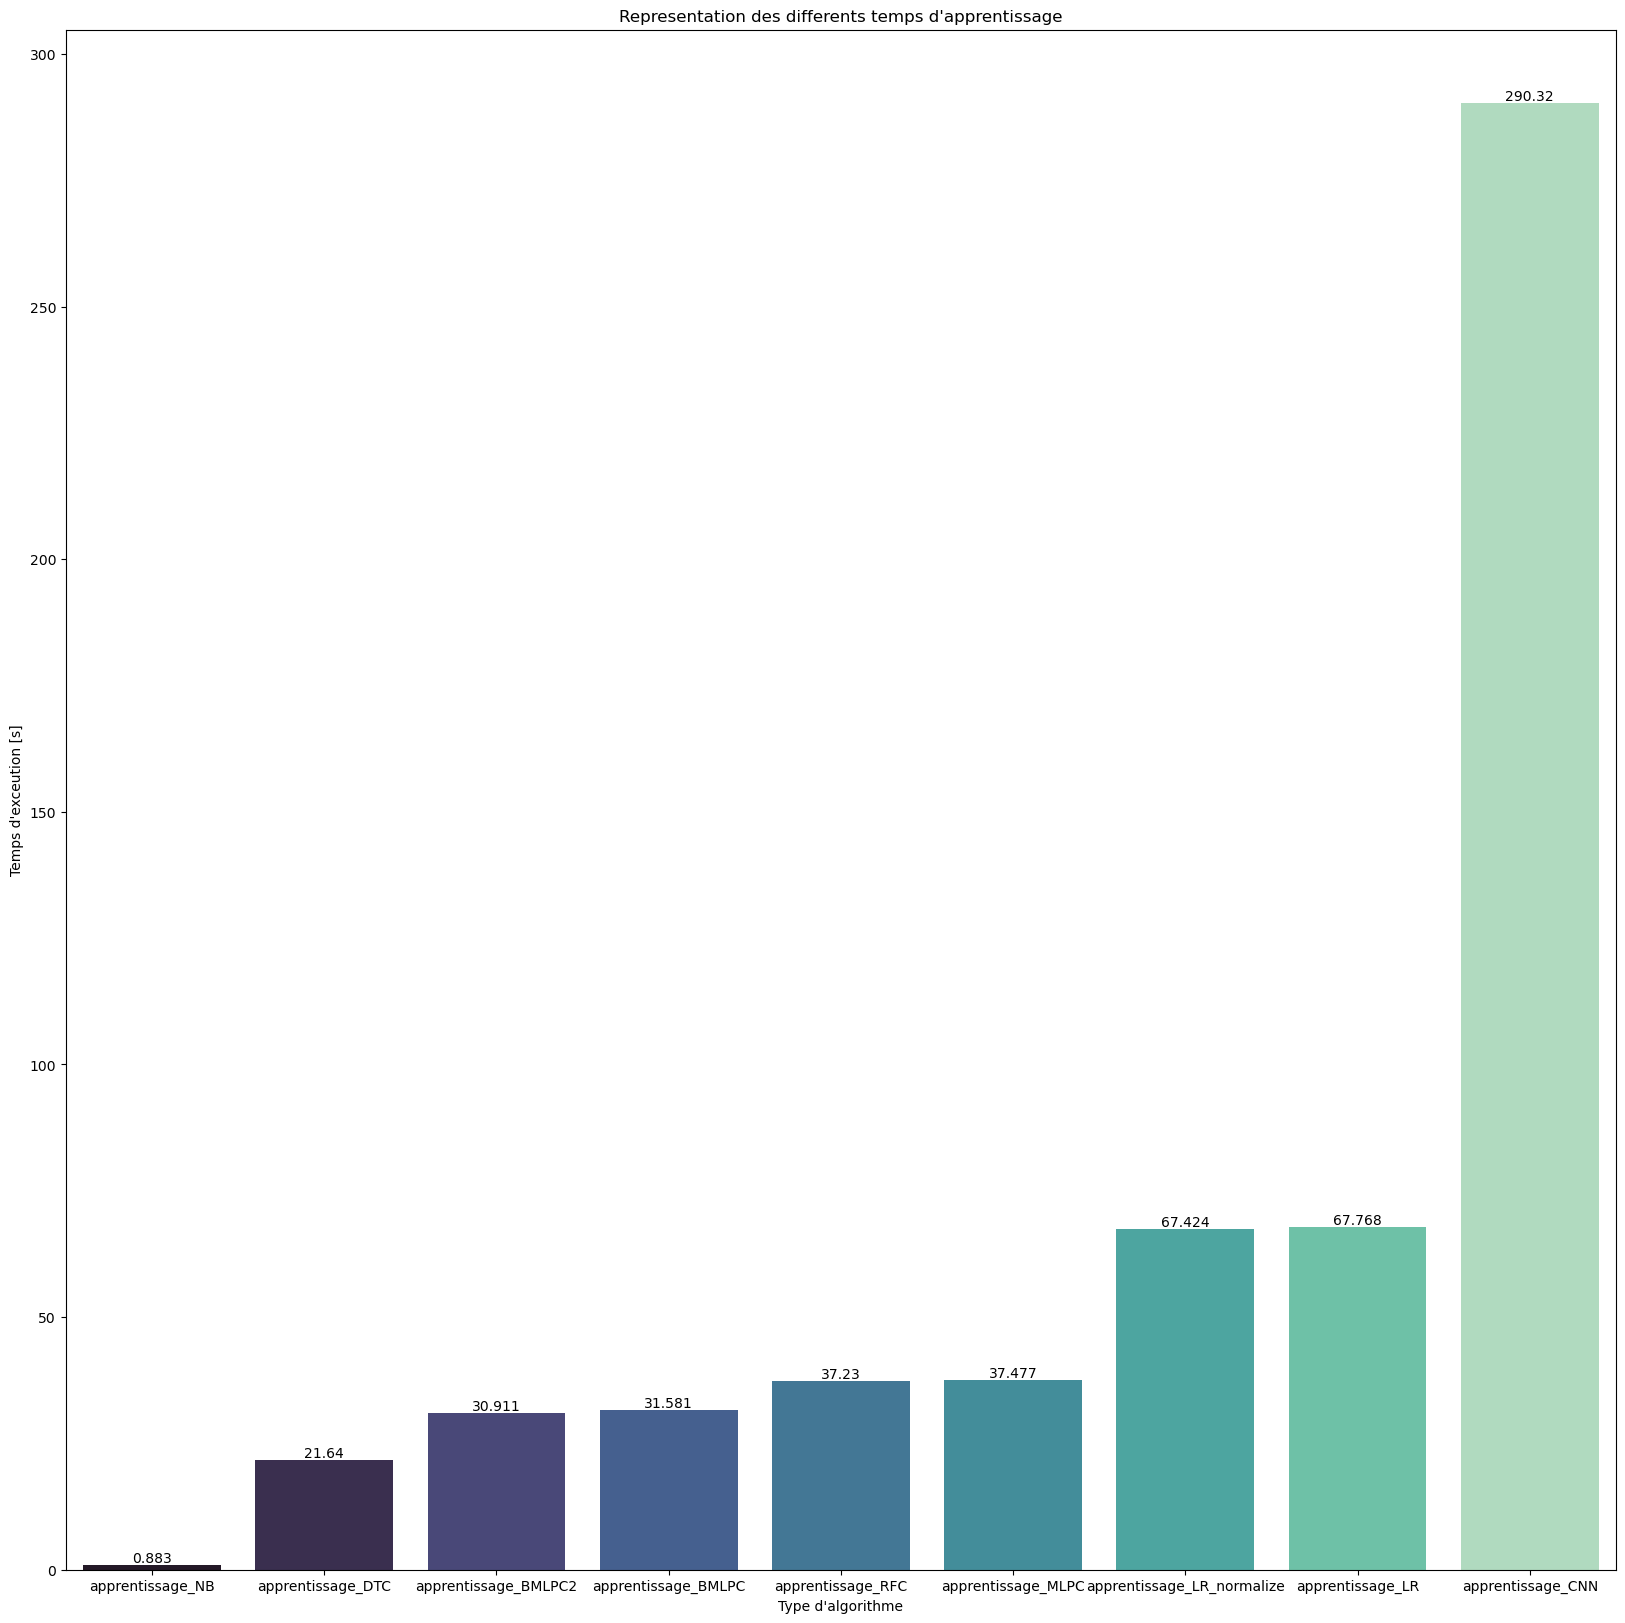

In [306]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('apprentissage_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

figure,ax = plt.subplots(figsize=(20, 20))
df_apprentissage = pd.DataFrame(data, index=['Temps_execution_s'])
df_apprentissage.sort_values(by=['Temps_execution_s'],axis=1,inplace=True)
# plt.figure(figsize=(20,20))
fig = sns.barplot(data = df_apprentissage,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Temps d'exceution [s]",title = "Representation des differents temps d'apprentissage")
fig.bar_label(ax.containers[0])

[Text(0, 0, '2.586'),
 Text(0, 0, '21.656'),
 Text(0, 0, '37.282'),
 Text(0, 0, '37.514'),
 Text(0, 0, '67.447'),
 Text(0, 0, '67.783'),
 Text(0, 0, '292.416'),
 Text(0, 0, '352.832'),
 Text(0, 0, '355.475')]

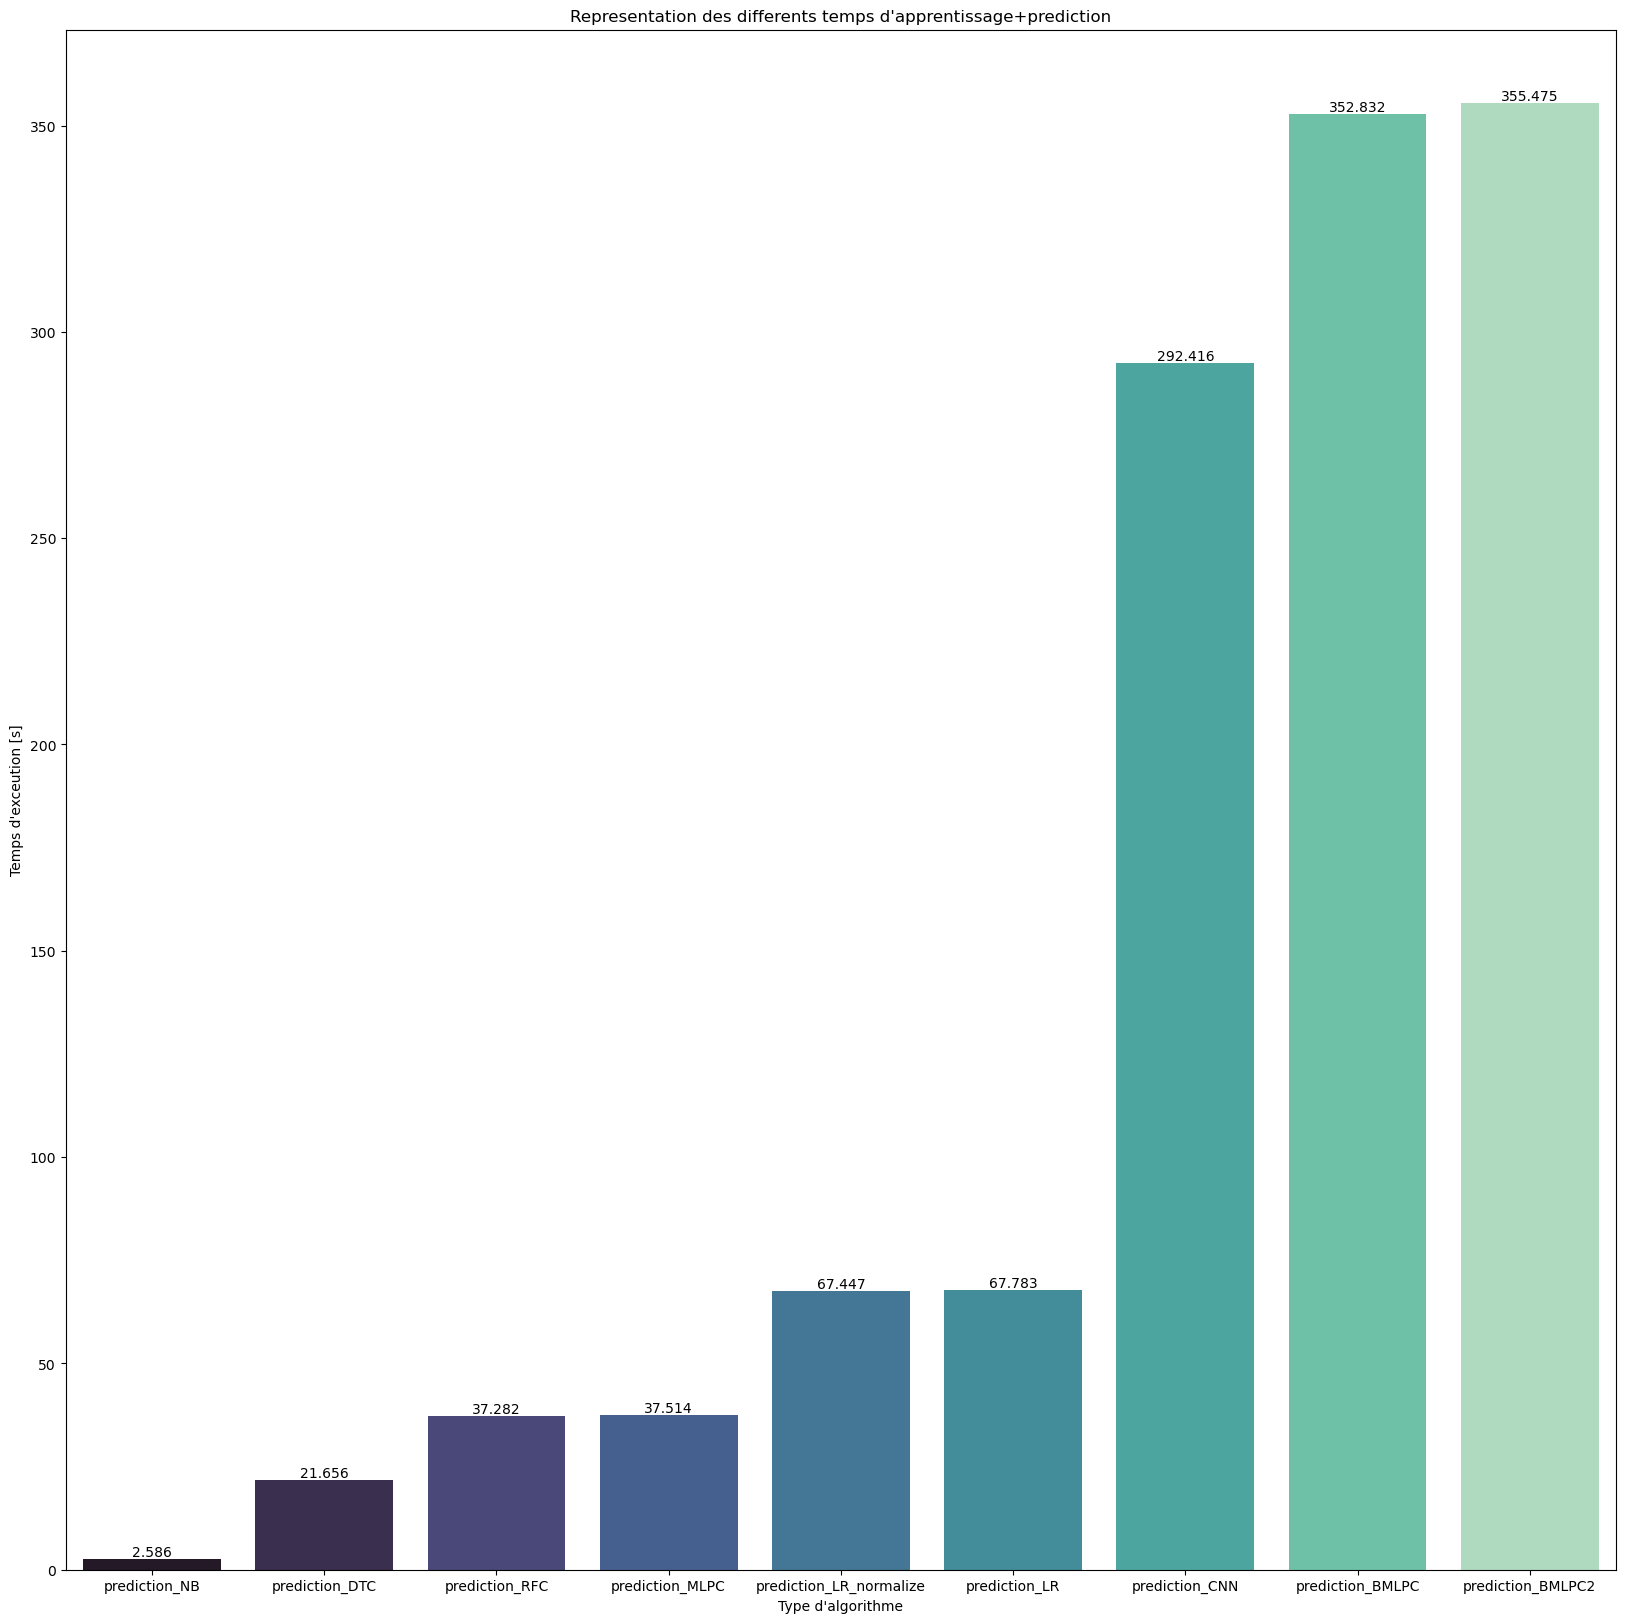

In [307]:
# Parcourt toutes les variables de l'environnement d'exécution
data = {}
for var in globals():
    # Vérifie si le nom de la variable commence par "apprentissage"
    if var.startswith('prediction_'):
        # Affiche le nom de la variable et sa valeur
        #print(var + ':', globals()[var])
        data[var] = globals()[var]

df_prediction = pd.DataFrame(data, index=['Temps_execution_s'])
df_prediction

figure,ax = plt.subplots(figsize=(20, 20))
df_prediction = pd.DataFrame(data, index=['Temps_execution_s'])
df_prediction.sort_values(by=['Temps_execution_s'],axis=1,inplace=True)
# plt.figure(figsize=(20,20))
fig = sns.barplot(data = df_prediction,palette='mako')
fig.set(xlabel="Type d'algorithme",ylabel="Temps d'exceution [s]",title = "Representation des differents temps d'apprentissage+prediction")
fig.bar_label(ax.containers[0])